网址：https://www.aqistudy.cn/

这个网站的反扒非常的狠，不建议从上面分析。网站的所有调试都给禁用了，只能使用抓包工具来分析。

这个网站起始是多个iframe，在一个页面嵌入另一个页面，其子页面都是嵌入的。

通过抓包工具拿到子页面的网站`https://www.aqistudy.cn/html/city_realtime.php?v=2.3`
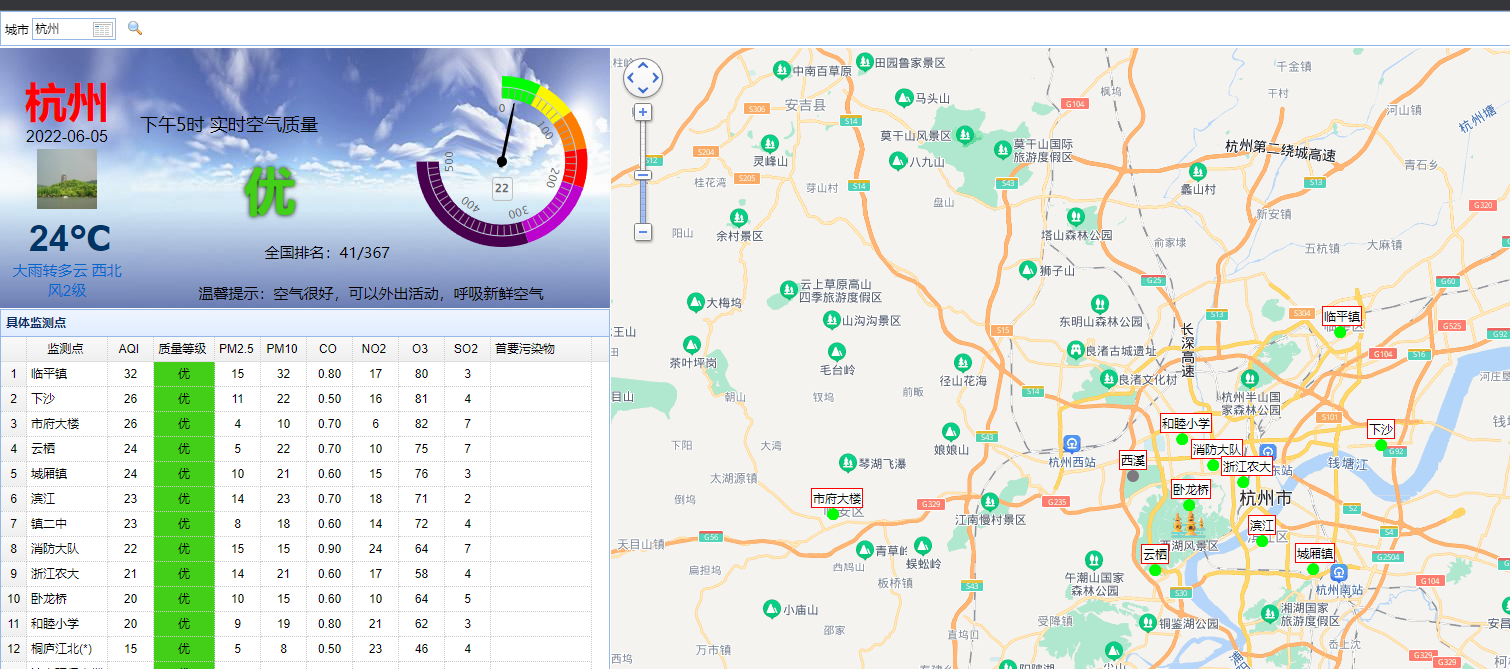

在调试时，会碰到无限debug
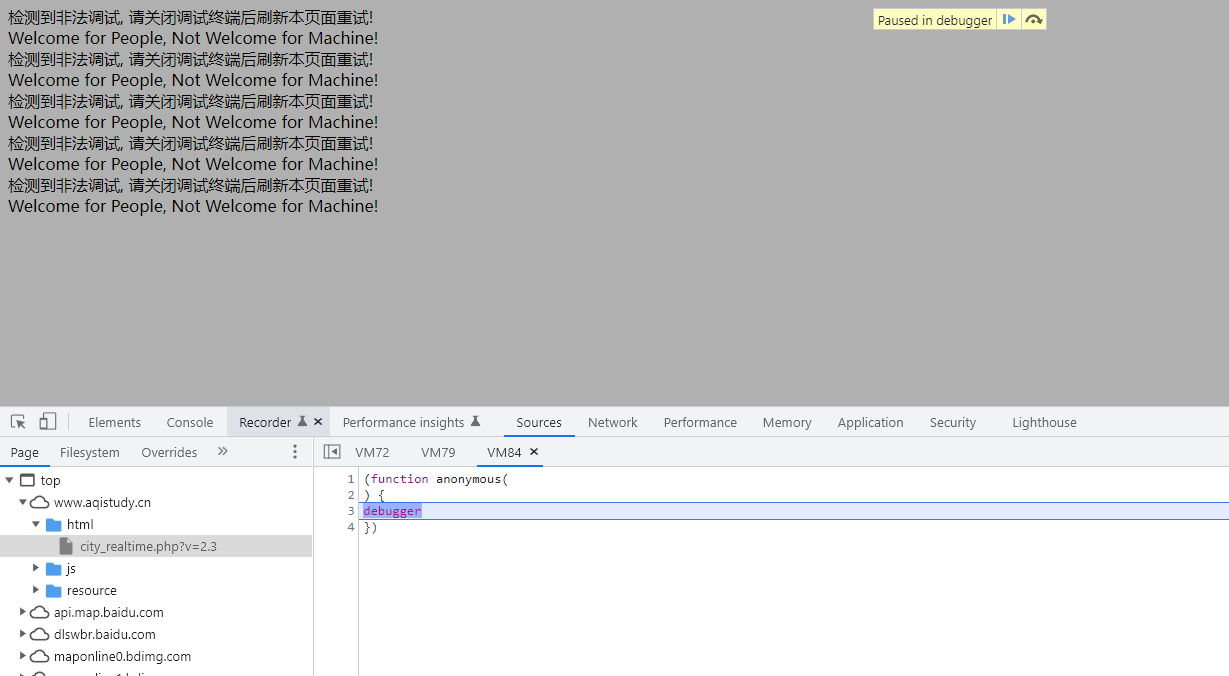

# 解决无线debug

## 方法一 

函数内容置空法：将关键函数替代掉

本例中，是`debug`结合`window.setInterval`来完成debug的。

1. 我们只需要能找到第一个加载的js，将代码打上断点停在第一行
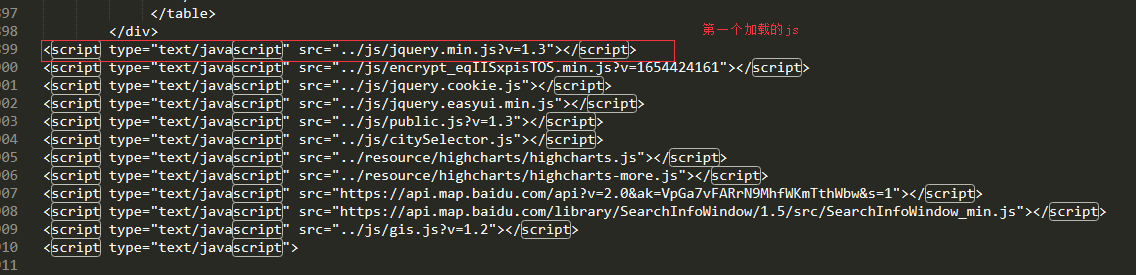

2. 重新运行程序，停在断点处
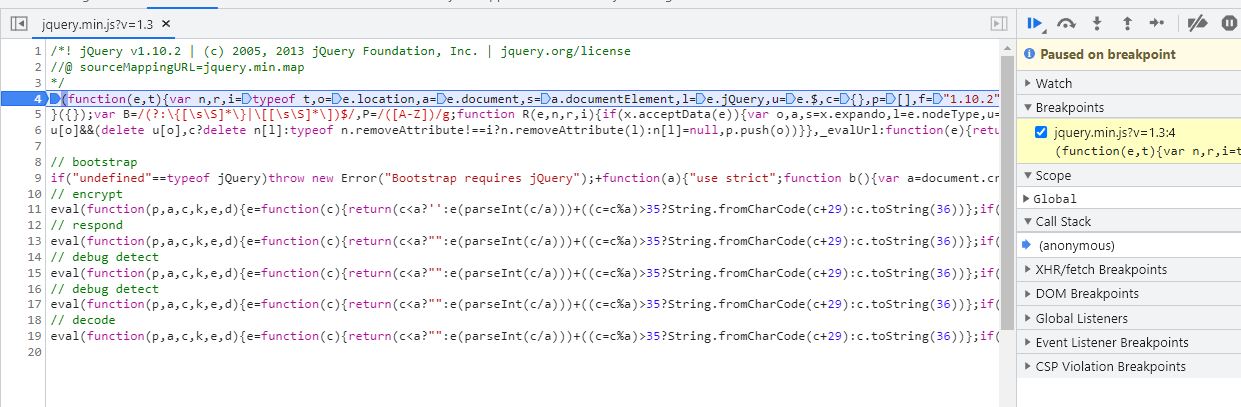

3. 打开console，将`window.setInterval`替换掉
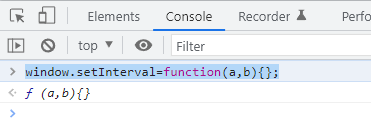

4. 点击释放断点
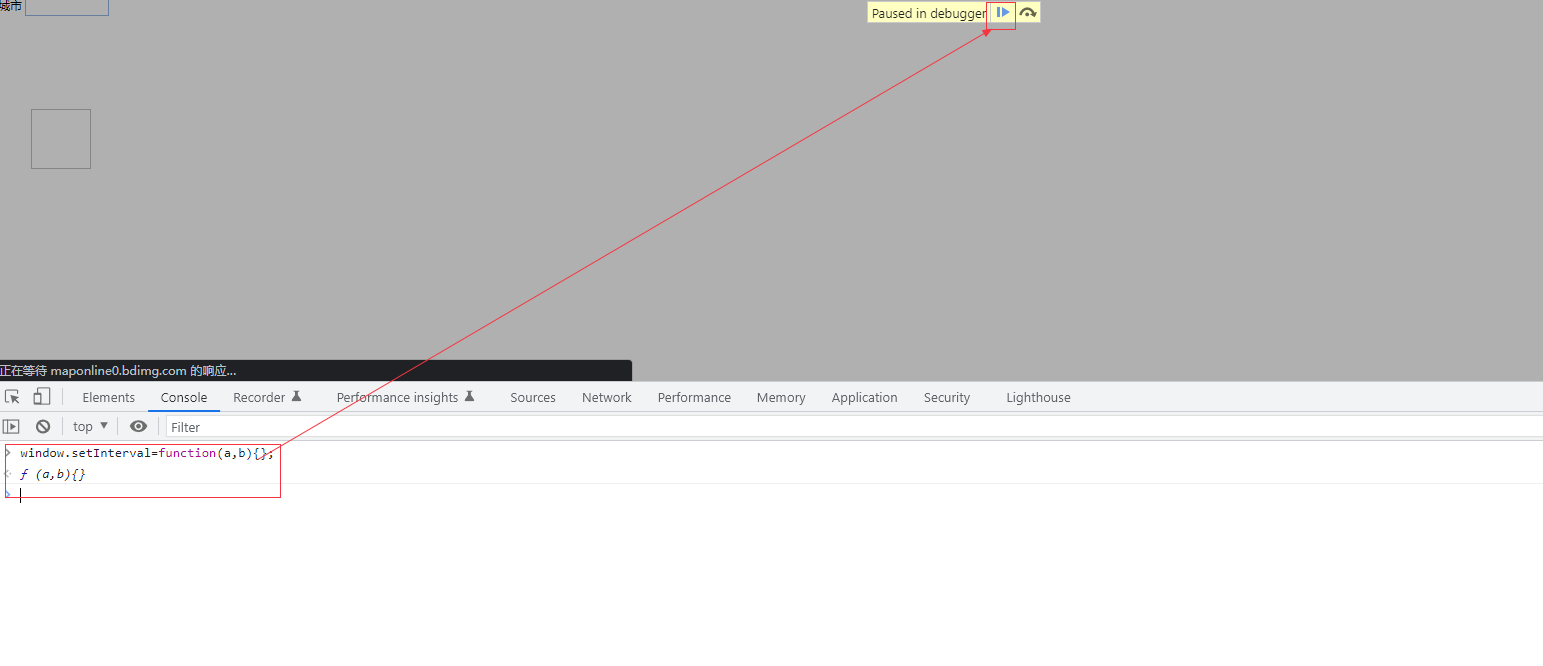

5. 此时就可以抓包了(这是子页面的方案)，不要刷新页面，刷新之后得重新操作
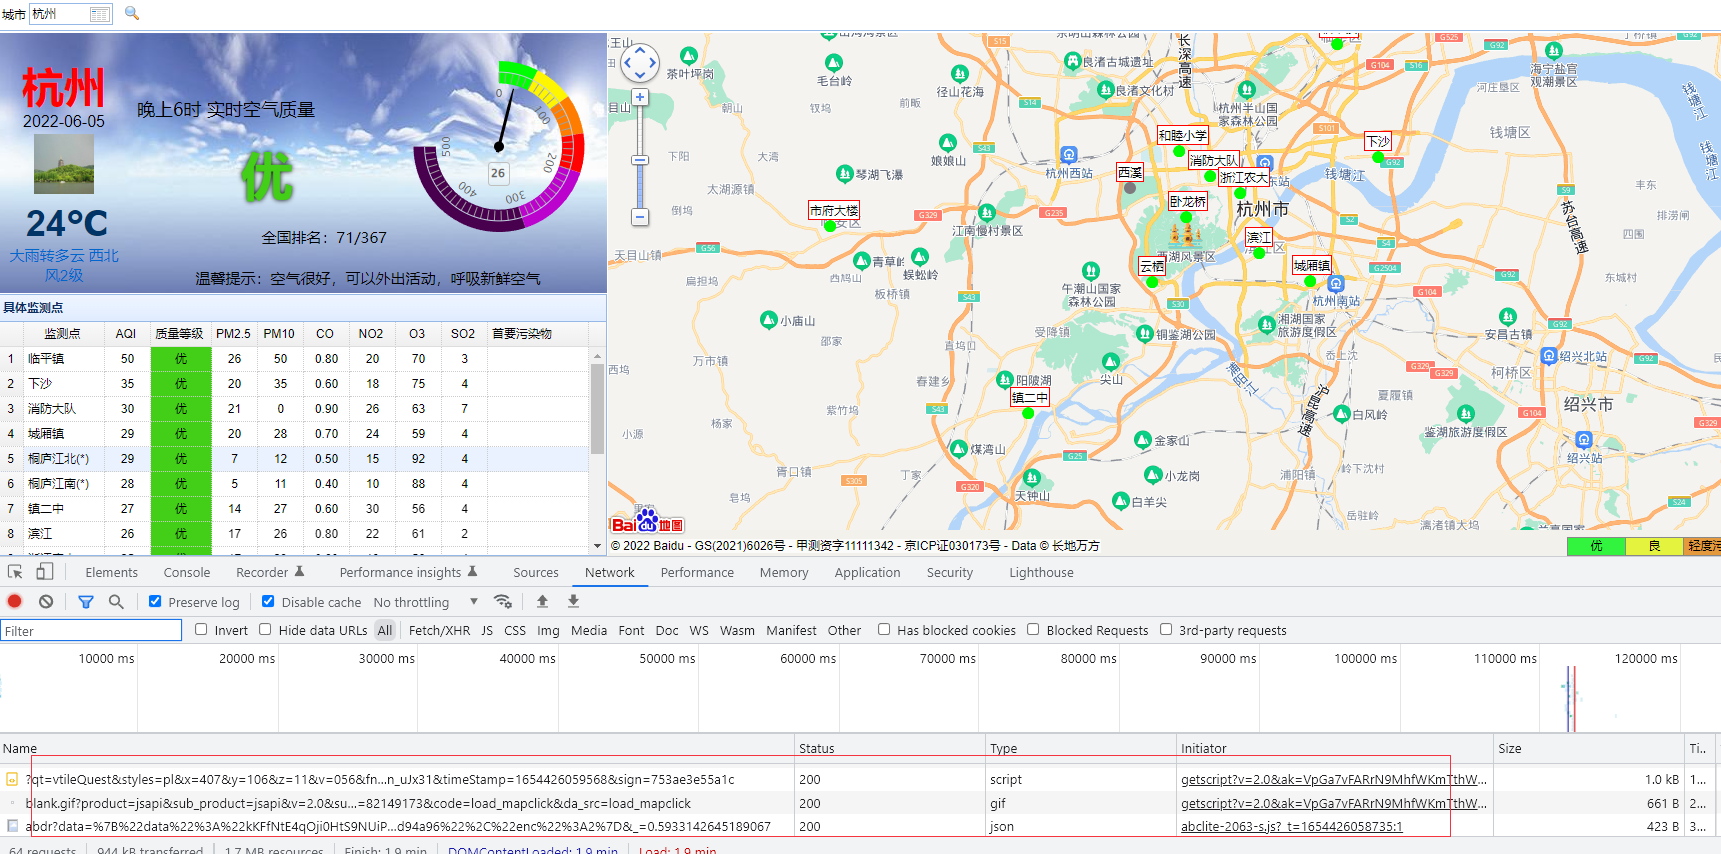


## 方法二

使用hook，
1. 在第一个js加载时，打断点
2. 进入
![image.png](attachment:image.png)
3. 新建一个hook
![image-2.png](attachment:image-2.png)

```js
(function () {
    'use strict';

    window.__cr_Interval = window.setInterval

    function myInte(src) {
        console.log("interval");
        //return window.__cr_eval(src)
    }
    // 下面做的事情可以理解成 window.setInterval = xxxxx，当执行window.setInterval时会自动调用到myInte函数，将myInte的return注释掉，就能禁用setInterval了
    Object.defineProperty(window, 'setInterval', {
        value: myInte
    })
})();
```
4. 设置为运行
![image-3.png](attachment:image-3.png)
5. 释放当前断点
6. 就可以进行抓包调试了，不要刷新页面，刷新要重新运行hook


## 其他的hook

在设置值时，打上断点，程序就会停在赋值的那行代码上
```js
(function () {  // hook
    'use strict';
    Object.defineProperty(window, 'Kar98k', {
        set: function(val) {
                console.log('Setting window._t', val);
                debugger; // 加上debugger.
                t = val;
            }
        })
})();

// window.Kar98k = ""; // debugger, 当程序执行到这行代码时，会自动停在此处。
```